In [98]:
import pandas as pd
import numpy as np
import re
import glob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import make_moons


%matplotlib inline

137

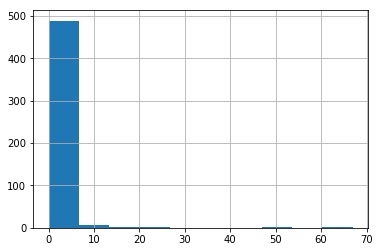

In [99]:
pd.read_csv("/Users/krista/Desktop/w266-project-master/data/data_Las_Vegas/2017-09-11.csv", delimiter=";")["favorites"].hist()
np.sum(pd.read_csv("/Users/krista/Desktop/w266-project-master/data/data_Las_Vegas/2017-09-11.csv", delimiter=";")["favorites"] > 0)

In [100]:
n_samples = 2000
n_features = 1000
n_components = 20
n_top_words = 20

In [101]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [102]:
np.sum(pd.read_csv("/Users/krista/Desktop/w266-project-master/data/data_Las_Vegas/2017-09-10.csv", delimiter=";")["favorites"] < 1)

374

In [103]:
pattern = "http"

In [104]:
dirs = glob.glob("/Users/krista/Desktop/w266-project-master/data/data_Las_Vegas/*.csv")
sentences = []

def clean(dirs):

    for dir_ in dirs:
        try:
            df = pd.read_csv(dir_, delimiter=";")
    #         df = df[~df.text.str.contains(pattern)]
            new_sentences = list(df['text'].values)
            for sentence in new_sentences:
    #             regex = re.compile('[^a-zA-Z]')
    #             sentence = regex.sub(sentence, regex)
                sentence = re.sub(r'^https?:\/\/.*[\r\n]*', '', sentence, flags=re.MULTILINE)
                sentence = re.sub(" \d+", '', sentence)
                sentence = re.sub(r'\w*\d\w*', '', sentence)

                sentences.append(sentence)
        except Exception as e:
            print e

In [105]:
clean(dirs)

expected string or buffer
Error tokenizing data. C error: Expected 10 fields in line 1755, saw 11

Error tokenizing data. C error: Expected 10 fields in line 239, saw 11

expected string or buffer
Error tokenizing data. C error: Expected 10 fields in line 296, saw 11

expected string or buffer
expected string or buffer
expected string or buffer
expected string or buffer
expected string or buffer
expected string or buffer
expected string or buffer
expected string or buffer
expected string or buffer
expected string or buffer
expected string or buffer
expected string or buffer


In [78]:
print len(sentences)

29966


In [79]:
sentences[:10]

['Congratulations to Mr. & Mrs. Clifford! Another sister to the lot\xe2\x80\xa6 https://www. instagram.com/p/ / \xe2\x80\xa6',
 '#cloudwatcherextraordinaire @Las Vegas, Nevada https://www. instagram.com/p//',
 'We made a #realtor very happy with our #homestaging job today! #realestate #interiordesign \xe2\x80\xa6 https://www. instagram.com/p//',
 '#Sammich with #flaminghotcheetos spread #lasvegas #foodie #food #sandwich # #downtownlv @\xe2\x80\xa6 https://www. instagram.com/p//',
 'clear sky -> few clouds temperature up\xc2\xb0F ->\xc2\xb0F humidity down% ->%',
 "Blessed to have spent time with old friends and new this past week. They remind me of all that's\xe2\x80\xa6 https://www. instagram.com/p//",
 '#PAzAZzStArChoreographer #THEREALPAZAZZ #pazazz #me #vegas #lasvegas @Las Vegas, Nevada https://www. instagram.com/p//',
 'Niners just just as bad with Hoyer at QB. It will be another long season. On the bright side, the Seacocks lost.',
 '#sundayfunday #rehabpoolparty @Rehab Las Vegas

In [80]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=10,
                                   max_features=10**5,
                                   stop_words='english',
                                   strip_accents="ascii"
                                  )
tfidf = tfidf_vectorizer.fit_transform(sentences)

In [81]:
tfidf_vectorizer.vocabulary_.keys()[:10]

[u'hanging',
 u'bringing',
 u'wednesday',
 u'stationcasinos',
 u'cooking',
 u'arialv',
 u'kids',
 u'golden',
 u'music',
 u'want']

In [82]:
print tfidf.shape

(29966, 2892)


In [83]:
tfidf = tfidf.todense()
tfidf = np.unique(tfidf, axis=0)

In [84]:
print tfidf.shape
from scipy import sparse
tfidf = sparse.csr_matrix(tfidf)

(24509, 2892)


In [85]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [95]:
nmf = NMF(n_components=n_components, random_state=1,
          max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words=20)

Topic #0: vegas las bellagio venetian north en cosmopolitan wynn grand downtown mgm fabulous welcome center palazzo bz good sign convention stratosphere
Topic #1: bit ly vegastraffic xxmewb accident http blvd rd clark ave nb sb reported approaching right eb dr wb ramp charleston
Topic #2: swarmapp nv henderson las lasairport mccarran international airport lunch bar home cafe center pic grill buffet burger restaurant passenger picking
Topic #3: beer untp drinking http photo ipa khourysfinewine ale tenayacreek hopnutsbrewing bangerbrewing zombies bottle share beerhaus lager stout hop light sincitybeer
Topic #4: lasvegas en lasvegasstrip bellagio tour usa home sincity hiring wynn circlepix vivalasvegas fremont travel lifeisbeautiful vegas lv mandalaybay vegasstrip brunch
Topic #5: casino hotel resort rock mirage aria mandalay bay hard luxor paris planet hollywood spa red york flamingo orleans excalibur en
Topic #6: just posted photo video bz got like listed retweet park restaurant world w

In [96]:
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

In [94]:
print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)



Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: vegas las venetian downtown cosmopolitan wynn city baby golf club palazzo stratosphere tbt hello lunch sun em lake shooting walking
Topic #1: bit http ly vegastraffic accident xxmewb right blvd rd clark lasvegas ave summerlin nb dr left south sb approaching job
Topic #2: nv swarmapp henderson home tour lunch bar lasairport burger grill circlepix station cafe starbucks restaurant waiting listed newest retweet eating
Topic #3: beer drinking untp http world photo better big coffee nice start bad watch share light book house delicious ipa squad
Topic #4: repost getting come favorite sunday make today friends excited let going days week meet family sure get_repost stop working guys
Topic #5: casino hotel resort rock hard red mandalay bay aria canyon view hollywood planet paris spa room mirage luxor flamingo pool
Topic #6: like know im look don got want need say lol way think dont feel oh did really believe boy said
To

In [88]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

Extracting tf features for LDA...


In [89]:
tf = tf_vectorizer.fit_transform(sentences)


In [90]:
lda = LatentDirichletAllocation(max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [91]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [92]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topic #0: instagram sema www com https arena mobile city bay club mandalay palace excited experience street adobemax semashow man fremont adobe
Topic #1: just posted photo happy north humidity windmph video clear temperature sky let going mph live weather la current pressuremb job
Topic #2: com https www vegas las nv swarmapp instagram casino hotel life henderson en resort venetian days convention aria center hollywood
Topic #3: com twitter pic night http need game year nfl mp raidernation status town vegasgoldenknights tomorrow new flamingo raiders week guy
Topic #4: https instagram www com don free guys getting friday ladies morning text vip sat awesome valley stop having paradise fri
Topic #5: http bit ly vegastraffic accident xxmewb lasvegas home blvd check tour rd clark world ave think nb right circlepix feel
Topic #6: https instagram www com tonight day today love halloween great time party beautiful got weekend fun birthday thank nightclub ready
Topic #7: https com www instagram